Task 1

Parameters:
Core:
    thickness: 220 nm
    width: 200-1000 nm
    refractive index n_Si: 3.478
Cladding:
    refractive index n_SiO2: 1.444
Simulation:
    wl: 1550 nm
    computational domain: 10 per 10 micron
    step: ranging
    boundary condition: PML

Task 1b

Sweeping for 9 equidistantantly spaced waveguide widths

In [4]:
import numpy as np

In [62]:
width = np.linspace(200, 1000, 9)
te1 = [1.478242, 1.823058, 2.228103, 2.446535, 2.569330, 2.643266, 2.691805, 2.724915, 2.748829]
te2 = [0, 0, 0, 1.490739, 1.689905, 1.957411, 2.169324, 2.315967, 2.421200]
tm1 = [1.493306, 1.588532, 1.685372, 1.765191, 1.824243, 1.868696, 1.901390, 1.926592, 1.816385]
te3 = [0, 0, 0, 0, 0, 0, 0, 0] #i'm not sure i think it's not present 
tm2 = [0, 0, 0, 0, 0, 1.456982, 1.521948, 1.590353, 1.650839]
tm31 = [0, 0, 0, 0, 0, 0, 1.460867, 1.603574, 1.650839]
new = [1.490739, 1.689905, 1.957411, 2.169324]
print(np.array(te1).shape)


(9,)


In [52]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [63]:
def line(x, a, b):
    return a*x+b

popt,pocv = curve_fit(line, np.linspace(500, 800, 4), new)
print("y=ax+b, [a,b]=", popt, "\nborder", (1.444-popt[1])/popt[0])


y=ax+b, [a,b]= [0.00230326 0.3297251 ] 
border 483.78142966294575


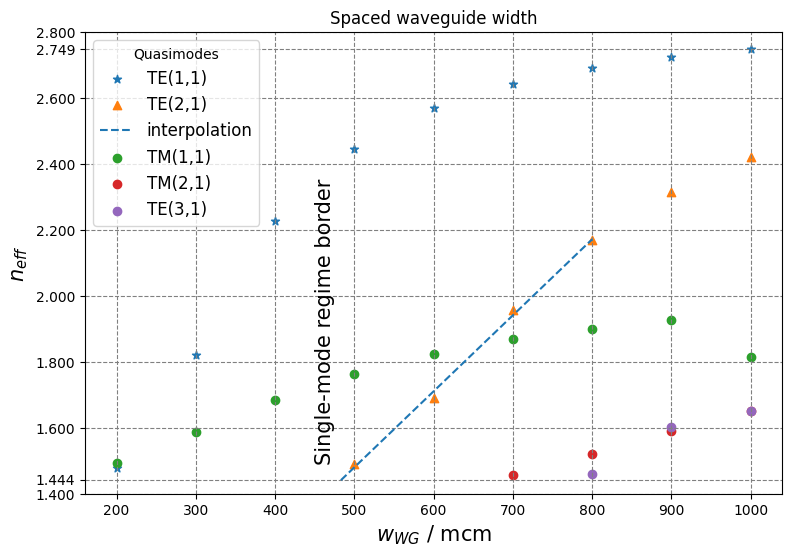

In [65]:
plt.figure(figsize=(9, 6))
plt.grid(color = "gray", linestyle="--")
plt.scatter(width, te1, label = 'TE(1,1)', marker = '*')
plt.scatter(width, te2, label = 'TE(2,1)', marker = '^')

x = np.linspace(483, 800)
y = popt[0]*x + popt[1]
plt.plot (x, y, label = 'interpolation', linestyle = "--")

plt.scatter(width, tm1, label = 'TM(1,1)')
plt.scatter(width, tm2, label = 'TM(2,1)')
plt.scatter(width, tm31, label = 'TE(3,1)')
plt.legend(title = 'Quasimodes', fontsize = 12)
plt.ylim([1.440, 2.8])
extraticks = [1.444, 2.748829]
plt.yticks(list(plt.yticks()[0]) + extraticks)
plt.title('Spaced waveguide width')
plt.ylabel('$n_{eff}}$', fontsize = 15)
plt.xlabel('$w_{WG}}$ / mcm', fontsize = 15)
plt.text(450, 1.5, "Single-mode regime border", rotation = 'vertical', fontsize = 15)
plt.show()

To derive Group Velocity Dispersion (GVD)
Definition:
$v_{phase} = \frac \omega k, v_{phase} = \frac c {n_{eff}} \\ 
v_{group} = \frac {\partial \omega} {\partial k}, v_{group} = \frac c {n_{group}} \\ 
GVD = \frac {\partial v_{group}}{\partial k} = \frac {\partial^2 \omega} {\partial k^2} \\
GVD = - \frac {\partial n_g} {\partial \omega} \cdot\frac {2 \pi} c$

In [2]:
import sys
import matplotlib.patches as patches


def read_txt (fName, fLoc = "./resourse/", header = 3):
    f = open (fLoc + fName, 'r')
    wl = []
    ng = []
    for i in range (header):
        next(f)
    for line in f: 
        a = line.split()[0]
        b = float(a.replace(',', ''))
        if (b > 1.48) and (b < 1.62):
            wl.append(b)
            ng.append(np.float128(line.split()[1]))
    f.close()
    return np.array(wl), np.array(ng)

[2.15353 2.15361 2.15368 2.15374 2.15379 2.15384 2.15388 2.1539  2.15393
 2.15394 2.15395 2.15395 2.15394 2.15393 2.15391 2.15389 2.15386 2.15382
 2.15378 2.15374]


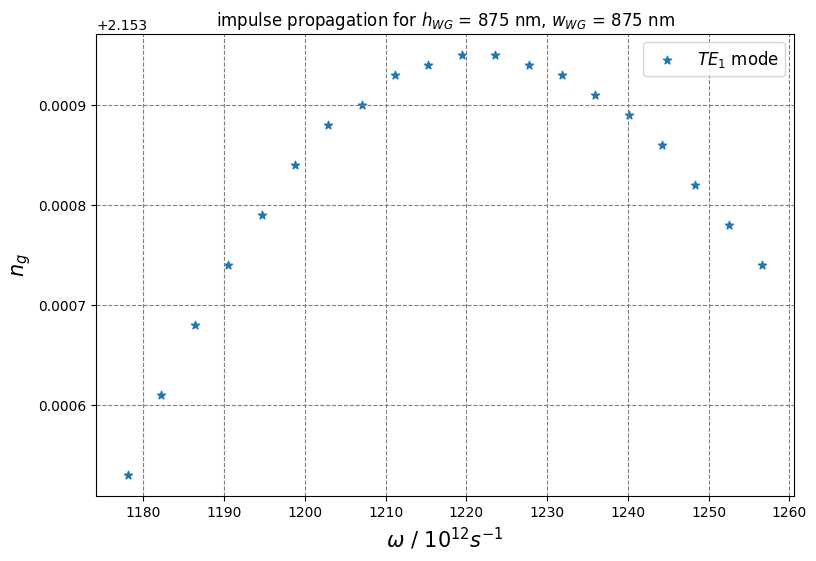

In [10]:
fName2 = "ngr_wl_875per875.txt"
wl2, ng2 = read_txt(fName2)
print (ng2)
w2 = 2*np.pi*3*10**2 /wl2 #Thz 
plt.figure(figsize=(9, 6))
plt.grid(color = "gray", linestyle="--")
plt.scatter(w2, ng2, label = '$TE_1$ mode', marker = '*')
plt.legend(fontsize = 12)
plt.title('impulse propagation for $h_{WG}$ = 875 nm, $w_{WG}$ = 875 nm')
plt.ylabel('$n_{g}}$', fontsize = 15)
plt.xlabel('$\omega$ / $10^{12} s^{-1}$', fontsize = 15)
plt.show()

In [15]:
der = np.diff(ng2)/np.diff(w2)
interp_w = []
interp_wl = []
for i in range(len(w2)-1):    
    interp_w.append((w2[i] + w2[i+1])/2)
    interp_wl.append((wl2[i] + wl2[i+1])/2)
for j in range(len(der)):
    if (np.abs(der[j]) <= 0.0005e-6):
        peak_w = interp_w[j]
        peak_wl = interp_wl[j]
center = 1.55
w0=2*np.pi*3*10**2 /center #Thz

[ 1.93685473e-05  1.69201821e-05  1.45065917e-05  1.20927612e-05
  1.20976633e-05  9.68283817e-06  4.83512025e-06  7.25721443e-06
  2.42078774e-06  2.41809075e-06  0.00000000e+00 -2.41775278e-06
 -2.42017761e-06 -4.83614969e-06 -4.84173899e-06 -7.25722588e-06
 -9.66963908e-06 -9.68296609e-06 -9.67758512e-06]


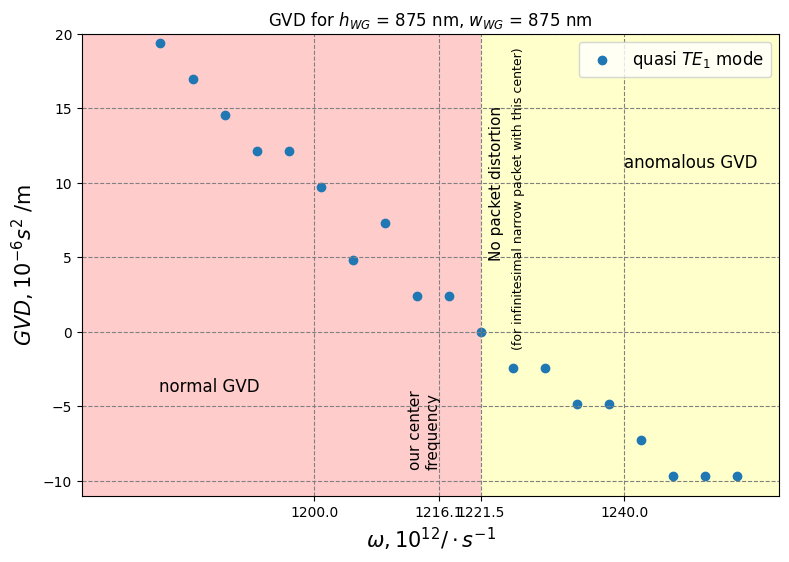

In [51]:
plt.figure(figsize=(9, 6))
plt.grid(color = "gray", linestyle="--")
rect1 = patches.Rectangle((1170.0,-11),peak_w-1170,31,linewidth=0,facecolor='r', alpha = 0.2)
rect2 = patches.Rectangle((peak_w,-11),1260-peak_w,31,linewidth=0,facecolor='yellow', alpha = 0.2)
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)

plt.scatter(np.array(interp_w), der*10**6, label = 'quasi $TE_1$ mode')
print (der)
plt.legend(fontsize = 12)
plt.title('GVD for $h_{WG}$ = 875 nm, $w_{WG}$ = 875 nm')
plt.ylabel('$GVD, 10^{-6}  {s^2}$ /m', fontsize = 15)
plt.xlabel('$\omega, 10^{12} / \cdot s^{-1}$', fontsize = 15)
plt.text(peak_w+1, 5, "No packet distortion", rotation = 'vertical', fontsize = 11)
plt.text(peak_w+4, -1, "(for infinitesimal narrow packet with this center)", rotation = 'vertical', fontsize = 9)
plt.text(w0-4, -9, "our center \nfrequency", rotation = 'vertical', fontsize = 11)
plt.text(1180, -4, "normal GVD", fontsize = 12)
plt.text(1240, 11, "anomalous GVD", fontsize = 12)
extraticks = [peak_w, w0]
plt.xticks(list(plt.xticks()[0])[::2] + extraticks)
plt.xlim([1170.0, 1260.0])
plt.ylim([-11, 20])
plt.show()

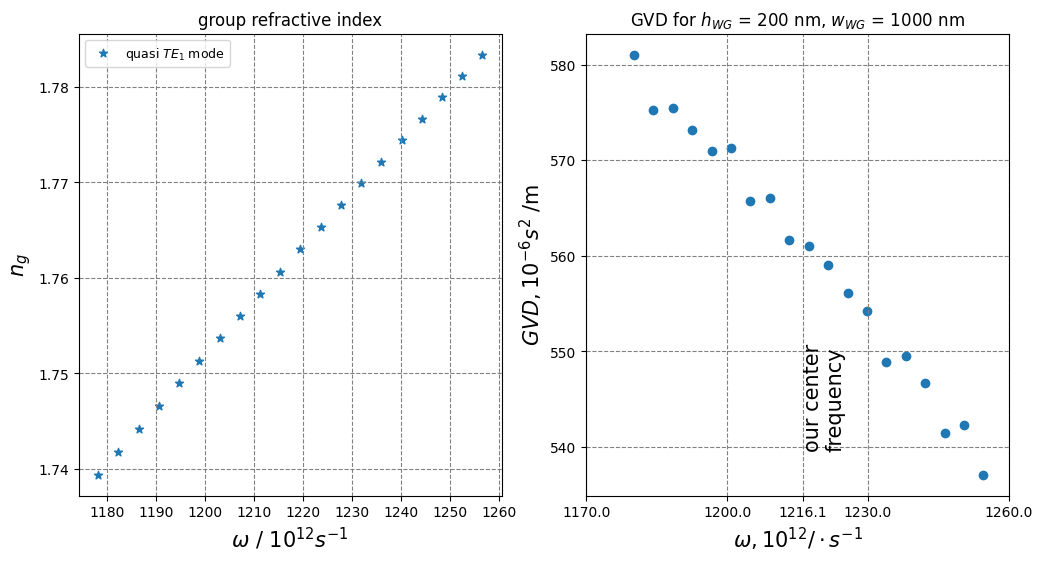

In [141]:
center = 1.55
w0=2*np.pi*3*10**2 /center #Thz

fName3 = "ngr_wl_200.txt"
wl3, ng3 = read_txt(fName3)
w3 = 2*np.pi*3*10**2 /wl3 #Thz 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.grid(color = "gray", linestyle="--")
ax1.scatter(w3, ng3, label = 'quasi $TE_1$ mode', marker = '*')
ax1.legend(fontsize = 9)
ax1.set_title('group refractive index')
ax1.set_ylabel('$n_{g}}$', fontsize = 15)
ax1.set_xlabel('$\omega$ / $10^{12} s^{-1}$', fontsize = 15)

der = np.diff(ng3)/np.diff(w3)
interp_w = []
for i in range(len(w3)-1):    
    interp_w.append((w3[i] + w3[i+1])/2)
ax2.scatter(np.array(interp_w), der*10**6, label = 'quasi $TE_1$ mode')
ax2.grid(color = "gray", linestyle="--")
ax2.set_ylabel('$GVD, 10^{-6}  {s^2}$ /m', fontsize = 15)
ax2.set_xlabel('$\omega, 10^{12} / \cdot s^{-1}$', fontsize = 15)
ax2.text(w0, 540, "our center \nfrequency", rotation = 'vertical', fontsize = 15)
extraticks = [w0]
ax2.set_xticks(list(plt.xticks()[0])[::3] + extraticks)
ax2.set_title('GVD')
plt.title('GVD for $h_{WG}$ = 200 nm, $w_{WG}$ = 1000 nm')
plt.show()

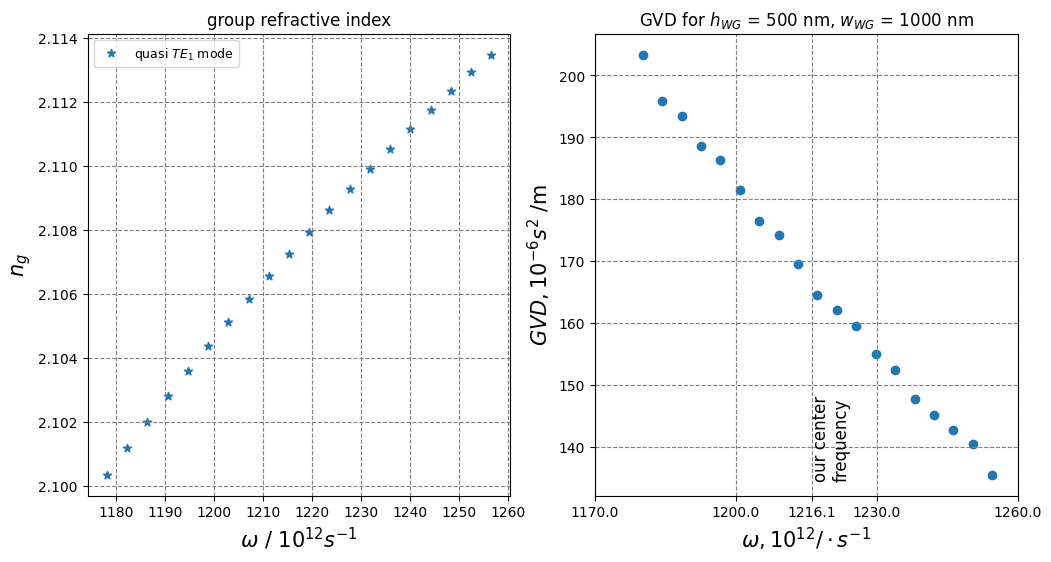

In [147]:
fName4 = "ngr_wl_500.txt"
wl4, ng4 = read_txt(fName4)
w4 = 2*np.pi*3*10**2 /wl4 #Thz 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.grid(color = "gray", linestyle="--")
ax1.scatter(w4, ng4, label = 'quasi $TE_1$ mode', marker = '*')
ax1.legend(fontsize = 9)
ax1.set_title('group refractive index')
ax1.set_ylabel('$n_{g}}$', fontsize = 15)
ax1.set_xlabel('$\omega$ / $10^{12} s^{-1}$', fontsize = 15)

der = np.diff(ng4)/np.diff(w4)
interp_w = []
interp_wl = []
for i in range(len(w4)-1):    
    interp_w.append((w4[i] + w4[i+1])/2)
    interp_wl.append((wl4[i] + wl4[i+1])/2)
ax2.scatter(np.array(interp_w), der*10**6, label = 'quasi $TE_1$ mode')
ax2.grid(color = "gray", linestyle="--")
ax2.set_ylabel('$GVD, 10^{-6}  {s^2}$ /m', fontsize = 15)
ax2.set_xlabel('$\omega, 10^{12} / \cdot s^{-1}$', fontsize = 15)
ax2.text(w0, 135, "our center \nfrequency", rotation = 'vertical', fontsize = 12)
extraticks = [w0]
ax2.set_xticks(list(plt.xticks()[0])[::3] + extraticks)
ax2.set_title('GVD')
plt.title('GVD for $h_{WG}$ = 500 nm, $w_{WG}$ = 1000 nm')
plt.show()

[1.6     1.59441 1.58885 1.58333 1.57785 1.57241 1.56701 1.56164 1.55631
 1.55102 1.54576 1.54054 1.53535 1.5302  1.52508 1.52    1.51495 1.50993
 1.50495 1.5    ] [2.1505  2.15031 2.1501  2.1499  2.14969 2.14948 2.14927 2.14906 2.14885
 2.14863 2.14841 2.14819 2.14797 2.14775 2.14753 2.1473  2.14708 2.14685
 2.14662 2.1464 ]
[1180.1624490274346, 1184.2961886135572, 1188.4327496573014, 1192.568127534461, 1196.7019948030184, 1200.8340196795175, 1204.9677306654721, 1209.1028403057753, 1213.2351924331224, 1217.3683828548387, 1221.5021121521268, 1225.6361304907, 1229.7701306528168, 1233.90385537242, 1238.0369896376283, 1242.16926874593, 1246.3045037561687, 1250.4383160895775, 1254.5704301677329]


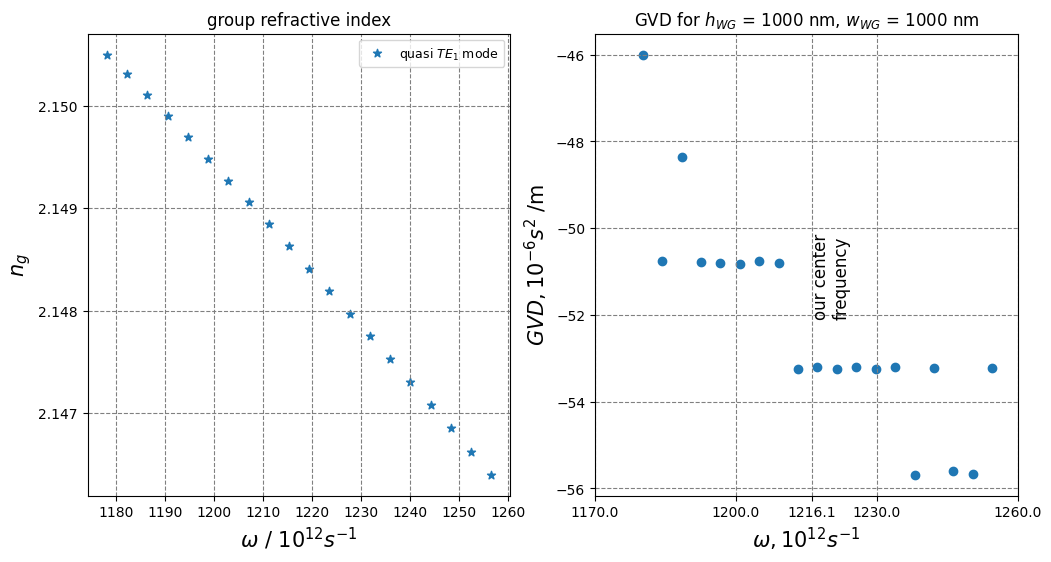

In [8]:
fName5 = "ngr_wl_1000.txt"
wl5, ng5 = read_txt(fName5)
center = 1.55
w0=2*np.pi*3*10**2 /center #Thz
print (wl5, ng5)
w5 = 2*np.pi*3*10**2/ wl5 #10^12 s^-1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.grid(color = "gray", linestyle="--")
ax1.scatter(w5, ng5, label = 'quasi $TE_1$ mode', marker = '*')
ax1.legend(fontsize = 9)
ax1.set_title('group refractive index')
ax1.set_ylabel('$n_{g}}$', fontsize = 15)
ax1.set_xlabel('$\omega$ / $10^{12} s^{-1}$', fontsize = 15)

der = np.diff(ng5)/np.diff(w5)
interp_w = []
for i in range(len(w5)-1):    
    interp_w.append((w5[i] + w5[i+1])/2)
print (interp_w)
ax2.scatter(np.array(interp_w), der*10**6, label = 'quasi $TE_1$ mode')
ax2.grid(color = "gray", linestyle="--")
ax2.set_ylabel('$GVD, 10^{-6}  {s^2}$ /m', fontsize = 15)
ax2.set_xlabel('$\omega, 10^{12} s^{-1}$', fontsize = 15)
#plt.text(peak_w, -7, "No paket distortion", rotation = 'vertical', fontsize = 15)
ax2.text(w0, -52, "our center \nfrequency", rotation = 'vertical', fontsize = 12)
#plt.text(2850, -3.8, "normal GVD", fontsize = 12)
#plt.text(2952, 0.2, "anomalous GVD", fontsize = 12)
extraticks = [w0]
ax2.set_xticks(list(plt.xticks()[0])[::3] + extraticks)
#ax2.set_xlim([2825.0, 3025.0])
#ax2.setylim([-8.0, 4.8])
ax2.set_title('GVD')
plt.title('GVD for $h_{WG}$ = 1000 nm, $w_{WG}$ = 1000 nm')
plt.show()